<hr>
<div align="center">
<font size="8">
  <b>String Vectorization Techniques</b> 
</font><br>
</div>
<hr>

# Prototype selection

Selection of prototypes in a string dataset. 

Aim of this step is to process and select a number of strings from a dataset and finish with the prototypes

## Two ways of prototype selection:

1. Using edit distastance as the distance of the algorithm [if-possible].
2. Create a table of all the distances between the strings and then give this table as input.


## Distances between strings examined:
- Edit/Levenshtein distance

# Toy dataset

In [1]:
dataset = ["one", "oone", "two", "twwo", "ttwoo", "three"]
dataset

['one', 'oone', 'two', 'twwo', 'ttwoo', 'three']

In [2]:
dataset_groundtruth = [0,0,1,1,1,2] 


# Algorithms performed with distances array


In [3]:
import editdistance
import numpy as np
import pandas as pd
import re
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def calculate_all_distances(dataset):
  dataset_size = len(dataset)
  string_distances_array = np.empty([dataset_size, dataset_size], dtype=int)

  for i in range(0, dataset_size):
    for j in range(0, dataset_size):
        string_distances_array[i][j] = editdistance.eval(dataset[i], dataset[j])
  
  return string_distances_array
  
string_distances_array = calculate_all_distances(dataset)


Algorithms

- K-Means

- FasterPAM (Schubert and Rousseeuw, 2020, 2021)

- FastPAM1 (Schubert and Rousseeuw, 2019, 2021)

- PAM (Kaufman and Rousseeuw, 1987) with BUILD and SWAP

- Alternating (k-means-style approach)

- BUILD (Kaufman and Rousseeuw, 1987)

- Silhouette (Kaufman and Rousseeuw, 1987)


Source:

https://python-kmedoids.readthedocs.io/en/latest/

## K-Means

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(string_distances_array)
print('Predicted: ', y_kmeans)

Predicted:  [0 0 1 1 1 2]


## FastPam/FastPam1

In [5]:
%pip install kmedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 354 kB 7.9 MB/s 


In [6]:
import kmedoids

methods = ['fasterpam', 'fastpam1']

for m in methods:
  print("\n- ", m, ":")
  km = kmedoids.KMedoids(3, method=m)
  c = km.fit(string_distances_array)
  print("Loss is:", c.inertia_)
  print("Selected centers are: ", [dataset[i] for i in c.medoid_indices_])
  print("Labels: ", c.labels_)


-  fasterpam :
Loss is: 4.0
Selected centers are:  ['twwo', 'three', 'oone']
Labels:  [2 2 0 0 0 1]

-  fastpam1 :
Loss is: 4.0
Selected centers are:  ['twwo', 'three', 'one']
Labels:  [2 2 0 0 0 1]


# Prototype selection without distance array

In [7]:
X = np.arange(len(dataset)).reshape(-1, 1)

def levenshtein(x, y):
    i, j = int(x[0]), int(y[0])     # extract indices
    return editdistance.eval(dataset[i], dataset[j])

## K-Medoids or PAM — Partitioning Around Medoids

```
    """k-medoids clustering.


    Parameters
    ----------
    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of medoids to
        generate.

    metric : string, or callable, optional, default: 'euclidean'
        What distance metric to use. See :func:metrics.pairwise_distances
        metric can be 'precomputed', the user must then feed the fit method
        with a precomputed kernel matrix and not the design matrix X.

    method : {'alternate', 'pam'}, default: 'alternate'
        Which algorithm to use. 'alternate' is faster while 'pam' is more accurate.

    init : {'random', 'heuristic', 'k-medoids++', 'build'}, optional, default: 'build'
        Specify medoid initialization method. 'random' selects n_clusters
        elements from the dataset. 'heuristic' picks the n_clusters points
        with the smallest sum distance to every other point. 'k-medoids++'
        follows an approach based on k-means++_, and in general, gives initial
        medoids which are more separated than those generated by the other methods.
        'build' is a greedy initialization of the medoids used in the original PAM
        algorithm. Often 'build' is more efficient but slower than other
        initializations on big datasets and it is also very non-robust,
        if there are outliers in the dataset, use another initialization.

        .. _k-means++: https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf

    max_iter : int, optional, default : 300
        Specify the maximum number of iterations when fitting. It can be zero in
        which case only the initialization is computed which may be suitable for
        large datasets when the initialization is sufficiently efficient
        (i.e. for 'build' init).

    random_state : int, RandomState instance or None, optional
        Specify random state for the random number generator. Used to
        initialise medoids when init='random'.

    Attributes
    ----------
    cluster_centers_ : array, shape = (n_clusters, n_features)
            or None if metric == 'precomputed'
        Cluster centers, i.e. medoids (elements from the original dataset)

    medoid_indices_ : array, shape = (n_clusters,)
        The indices of the medoid rows in X

    labels_ : array, shape = (n_samples,)
        Labels of each point

    inertia_ : float
        Sum of distances of samples to their closest cluster center.

```

In [8]:
%pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.3 MB/s 


In [9]:
import sklearn
import sklearn_extra
from sklearn_extra.cluster import KMedoids

X = np.arange(len(dataset)).reshape(-1, 1)
kmedoids = KMedoids(n_clusters=3, metric=levenshtein, random_state=0, init='k-medoids++').fit(X)

print("Labels:  ", kmedoids.labels_)
centroids = [dataset[i] for i in kmedoids.cluster_centers_.reshape(1,-1).tolist()[0]]
print("Centers: ", centroids)
print("Inertia: ", kmedoids.inertia_)

Labels:   [1 1 0 0 0 2]
Centers:  ['two', 'oone', 'three']
Inertia:  4.0


In [10]:
kmedoids.cluster_centers_.reshape(1,-1).tolist()

[[2, 1, 5]]

## DBSCAN

Density-Based Spatial Clustering of Applications with Noise

No centroids are beeing calculated, only clusters.

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(metric=levenshtein, eps=1, min_samples=1)
dbscan.fit_predict(X)
print(dbscan.labels_)

[0 0 1 1 2 3]


## Nearest Neighbor clustering

DBSCAN uses Nearest Neighbor clustering

In [12]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2,  metric=levenshtein)
neigh.fit(X)
print(neigh.kneighbors())

(array([[1., 3.],
       [1., 4.],
       [1., 2.],
       [1., 2.],
       [2., 2.],
       [4., 4.]]), array([[1, 2],
       [0, 2],
       [3, 4],
       [2, 4],
       [2, 3],
       [0, 1]]))


In [13]:
neigh.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.]])

## K-Modes

This algorithm can only perform in CATEGORICAL data. Only for valiables that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

Reference

https://github.com/nicodv/kmodes

In [14]:
%pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import numpy as np
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

km = KPrototypes(n_clusters=3, init='Cao', n_init=2, verbose=2)

# clusters = km.fit_predict(np.asarray(dataset))

# # Print the cluster centroids
# print(km.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.


## CLARANS 

Clustering Large Applications based upon Randomized Search


__Source__

https://medium.com/analytics-vidhya/partitional-clustering-using-clarans-method-with-python-example-545dd84e58b4


In [16]:
%pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 7.3 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=32ebeb8b8e6b5791460fd4429d2669bf34f1c1851e6e9ab99802454022537009
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [17]:
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import timedcall

clarans_instance = clarans(string_distances_array, number_clusters=3, numlocal=6, maxneighbor=2);
clarans_instance.process()

#returns the clusters 
clusters = clarans_instance.get_clusters();

#returns the mediods 
medoids = clarans_instance.get_medoids();

print("Index of the points that are in a cluster : ",clusters)
print("The index of medoids that algorithm found to be best : ",medoids)
centroids = [dataset[i] for i in medoids]
print("Centers: ", centroids)


Index of the points that are in a cluster :  [[5], [0, 1], [2, 3, 4]]
The index of medoids that algorithm found to be best :  [5, 1, 4]
Centers:  ['three', 'oone', 'ttwoo']


# Comparison of Partitioning Methods

- __K-means:__ The k-means algorithm defines the centroid of a cluster as the mean value of the points within the cluster. That is why K-means is sensitive to noise and outliers because a small number of such data can substantially influence the mean value.

- __K-medoids:__ To overcome the problem of sensitivity to outliers, instead of taking the mean value as the centroid, we can take actual data point to represent the cluster, this is what K-medoids does. But the k-medoids methods is very expensive when the dataset and k value is large.

- __CLARA:__ To scale up the K-medoids method, CLARA was introduced. CLARA does not take the whole dataset into consideration instead uses a random sample of the dataset, from which the best medoids are taken. But the effectiveness of CLARA depends on the sample size. CLARA cannot find a good clustering if any of the best sampled medoids is far from the best k-medoids.

- __CLARANS__ (Clustering Large Applications based upon RANdomized Search) : It presents a trade-off between the cost and the effectiveness of using samples to obtain clustering.

# Selecting prototypes using their projections and their median value

# Vectorization - Embeddings


In [18]:
%pip install stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 8.1 MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24299 sha256=cca70bf00c2969eed5066029f88ac757e756cb99eeef45846923afe53d6e082a
  Stored in directory: /root/.cache/pip/wheels/e3/1c/58/620049eecc13fb5b4920470895e07a39f86e889a0a58b11976
Successfully built stats


In [19]:
from scipy import stats

def CreateVantageEmbeddings(strings, prototypes):

    # ------- Distance computing ------- #
    vectors = []
    for s in tqdm(range(0, len(strings)), desc="Creating embeddings"):
        string_embedding = []
        for p in range(0, len(prototypes)):
              string_embedding.append(metric(s, p))

        # --- Ranking representation ---- #
        ranked_string_embedding = stats.rankdata(string_embedding, method='min')

        # ------- Vectors dataset ------- #
        vectors.append(string_embedding)

    return np.array(vectors)

def metric(s, p):
    '''
    Embedding metric used for creating the space of objects
    '''
    return editdistance.eval(dataset[s], dataset[p])

# Dimension reduction - Edelman

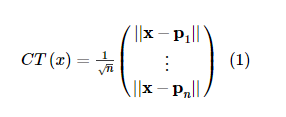



## __Problems/Questions__

1. What norm should we use?
2. Prototype reduction - which of the features we will remove? Randomly, first top-k?


In [45]:
import math
from math import sqrt
import numpy as np
from numpy.linalg import norm

def chorus_transform(X, P, n):
    '''
    x: input vectors
    p: prototypes
    n: new dimension / number of prototypes
    '''
    
    d = X.shape[1]
    x_size = X.shape[0]
    print("Initial dimension of x (d): ", d)
    print("Number of vectors", x_size)
    print("Number of prototypes (new dimension):", n) 
          
    n_sqrt = 1/sqrt(n)
    reduced_dimension_vectors = np.empty([X.shape[0], n])
    
    i = 0
    # Loop on all vectors/embeddings
    for x in X:
        new_x = np.empty(n)
        p_i = 0
        for p in P:
            new_x[p_i] = norm(x - p)
            p_i += 1
            
        reduced_dimension_vectors[i] = n_sqrt*new_x

        # Rank ordering
        # reduced_dimension_vectors[i] = n_sqrt*stats.rankdata(new_x, method='min')

        i += 1
        
    return reduced_dimension_vectors

# Experiments on small dataset


## Without projection of clusters

In [25]:
import kmedoids
from tqdm import tqdm

def experiments(model, X, string_distances_array, num_of_prototypes, new_reduced_dimension = None):

  prototypes = None
  if model == 'KMEDOIDS':
    print('\n> KMEDOIDS')
    km = KMedoids(n_clusters=num_of_prototypes, metric=levenshtein, random_state=0, init='k-medoids++').fit(X)
    prototypes = km.cluster_centers_.reshape(1,-1).tolist()[0]
  elif model == 'CLARANS':
    print('\n> CLARANS')
    clarans_instance = clarans(string_distances_array, number_clusters=num_of_prototypes, numlocal=6, maxneighbor=2)
    clarans_instance.process()
    clusters = clarans_instance.get_clusters()
    prototypes = clarans_instance.get_medoids()
  elif model == 'FASTERPAM':
    print('\n> FASTERPAM')
    km = kmedoids.KMedoids(num_of_prototypes, method='fasterpam').fit(string_distances_array)
    prototypes = km.medoid_indices_
  elif model == 'FASTPAM1':
    print('\n> FASTPAM1')
    km = kmedoids.KMedoids(num_of_prototypes, method='fastpam1').fit(string_distances_array)
    prototypes = km.medoid_indices_
  else:
    if model == 'DBSCAN':
      dbscan = DBSCAN(metric=levenshtein, eps=1, min_samples=1)
      dbscan.fit_predict(X)
    if model == 'KMEANS':
      kmeans = KMeans(n_clusters = 3)
      y_kmeans = kmeans.fit_predict(string_distances_array)

  vectors = CreateVantageEmbeddings(dataset, prototypes)
  print(vectors)
  reduced_dim_vectors = None
  if new_reduced_dimension:
    reduced_dim_vectors = chorus_transform(vectors, prototypes[:new_reduced_dimension], new_reduced_dimension)

  return vectors, reduced_dim_vectors

In [26]:
models_that_produce_centroids = ['KMEDOIDS','CLARANS','FASTERPAM','FASTPAM1']

for m in models_that_produce_centroids:
  experiments(m, X, string_distances_array, 3)


> KMEDOIDS


Creating embeddings: 100%|██████████| 6/6 [00:00<00:00, 12306.03it/s]


[[0 1 3]
 [1 0 4]
 [3 4 0]
 [4 4 1]
 [5 5 2]
 [4 4 4]]

> CLARANS


Creating embeddings: 100%|██████████| 6/6 [00:00<00:00, 33825.03it/s]


[[0 1 3]
 [1 0 4]
 [3 4 0]
 [4 4 1]
 [5 5 2]
 [4 4 4]]

> FASTERPAM


Creating embeddings: 100%|██████████| 6/6 [00:00<00:00, 39756.44it/s]


[[0 1 3]
 [1 0 4]
 [3 4 0]
 [4 4 1]
 [5 5 2]
 [4 4 4]]

> FASTPAM1


Creating embeddings: 100%|██████████| 6/6 [00:00<00:00, 35848.75it/s]

[[0 1 3]
 [1 0 4]
 [3 4 0]
 [4 4 1]
 [5 5 2]
 [4 4 4]]


# Simple experiment cell

In [27]:
# Dataset
dataset = ["one", "oone", "two", "twwo", "ttwoo", "three"]
# X is a mapping
X = np.arange(len(dataset)).reshape(-1, 1)

string_distances_array = calculate_all_distances(dataset)

# Working models: 'KMEDOIDS','CLARANS','FASTERPAM','FASTPAM1'
vectors, reduced_dim_vectors = experiments(
    'CLARANS', # model 
    X, # array of strings /  mapping
    string_distances_array,
    num_of_prototypes = 3, 
    new_reduced_dimension = 2
)


> CLARANS


Creating embeddings: 100%|██████████| 6/6 [00:00<00:00, 30727.50it/s]

[[0 1 3]
 [1 0 4]
 [3 4 0]
 [4 4 1]
 [5 5 2]
 [4 4 4]]
Initial dimension of x (d):  3
Number of vectors 6
Number of prototypes (new dimension): 2


In [28]:
vectors

array([[0, 1, 3],
       [1, 0, 4],
       [3, 4, 0],
       [4, 4, 1],
       [5, 5, 2],
       [4, 4, 4]])

In [29]:
reduced_dim_vectors

array([[3.16227766, 6.70820393],
       [4.12310563, 6.4807407 ],
       [5.        , 5.47722558],
       [5.74456265, 4.24264069],
       [7.34846923, 3.        ],
       [6.92820323, 1.73205081]])

## Without dimension reduction

In [30]:
# Dataset
dataset = ["one", "oone"]
# X is a mapping
X = np.arange(len(dataset)).reshape(-1, 1)

string_distances_array = calculate_all_distances(dataset)

# Working models: 'KMEDOIDS','CLARANS','FASTERPAM','FASTPAM1'
vectors, _ = experiments(
    'KMEDOIDS', # model 
    X, # array of strings /  mapping
    string_distances_array,
    num_of_prototypes = 2,
)
print(vectors)


> KMEDOIDS


Creating embeddings: 100%|██████████| 2/2 [00:00<00:00, 13595.80it/s]

[[0 1]
 [1 0]]
[[0 1]
 [1 0]]


# CORA dataset

In this section I will use medoids algorithms for the prototype selection.

In [31]:
from google.colab import drive
import os

drive.mount('/gdrive/')

Mounted at /gdrive/


In [32]:
with open('/gdrive/My Drive/GitHub/WinnER/data/coraIdDuplicates.csv', 'r') as f:
  CORA_groundTruth = pd.read_csv(f, sep = '|', header = None, names = ['id1','id2'])
with open('/gdrive/My Drive/GitHub/WinnER/data/coraProfiles.csv', 'r') as f:
  CORA = pd.read_csv(f, sep = '|')
  CORA = CORA.drop(columns = ["Unnamed: 13"])
CORA

,Entity Id,address,author,editor,institution,month,note,pages,publisher,title,venue,volume,year
0,0,"los alamitos, ca:","p. auer, n. cesa-bianchi, y. freund, and r. e....",NaN,NaN,NaN,NaN,pp. 322-331.,"ieee computer society press,",'gambling in a rigged casino: the adversarial ...,in proc. 36th annual symposium on foundations ...,NaN,"1995,"
1,1,NaN,"a. blum, m. furst, m. j. kearns, and richard j...",NaN,NaN,NaN,NaN,"pages 24.1-24.10,",NaN,cryptographic primitives based on hard learnin...,"in pre-proceedings of crypto '93,",NaN,1993.
2,2,NaN,"avrim blum, merrick furst, michael kearns, and...",NaN,NaN,NaN,NaN,"pages 24.1-24.10,",NaN,cryptographic primitives based on hard learnin...,"in pre-proceedings of crypto '93,",NaN,1993.
3,3,NaN,"avrim blum, merrick furst, michael kearns, and...","in douglas r. stinson, editor,",NaN,NaN,lecture notes in computer science no. 773.,pages 278-291.,"springer,",cryptographic primitives based on hard learnin...,"proc. crypto 93,",NaN,1994.
4,4,NaN,"a. blum, m. furst, m. kearns, r. lipton.",NaN,NaN,NaN,NaN,NaN,NaN,cryptographic primitives based on hard learnin...,"crypto,",NaN,1993.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,1290,NaN,robert e. schapire and yoram singer.,NaN,NaN,NaN,NaN,NaN,NaN,improved boosting algorithms using confidence-...,in proceedings of the eleventh annual conferen...,NaN,1998.
1291,1291,NaN,"schapire, r. e., freund, y., bartlett, p., & l...",NaN,NaN,NaN,annals of statistics (to appear).,NaN,NaN,boosting the margin: a new explanation for the...,NaN,NaN,(1998).
1292,1292,NaN,robert e. schapire and yoram singer. boostexter:,NaN,NaN,NaN,NaN,NaN,NaN,a system for multiclass multi-label text categ...,"unpublished manuscript,",NaN,1998.
1293,1293,NaN,robert e. schapire yoram singer.,NaN,NaN,NaN,submitted for publication. 17,NaN,NaN,improved boosting algorithms using confidence-...,NaN,NaN,NaN


In [33]:
# Dataset
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series
dataset = CORA['title'].apply(remove_punctuations)

# X is a mapping
X = np.arange(len(dataset)).reshape(-1, 1)

string_distances_array = calculate_all_distances(dataset)

In [34]:
# %time
# vectors, reduced_dim_vectors = experiments(
#     'CLARANS', # model 
#     X, # array of strings /  mapping
#     string_distances_array,
#     num_of_prototypes = 20
#     # new_reduced_dimension = 2
# )

In [35]:
%time
vectors, reduced_dim_vectors = experiments(
    'FASTERPAM', # model 
    X, # array of strings /  mapping
    string_distances_array,
    num_of_prototypes = 20,
    new_reduced_dimension = 15
)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs

> FASTERPAM


Creating embeddings: 100%|██████████| 1295/1295 [00:00<00:00, 4228.56it/s]


[[ 0 49 49 ... 57 57 57]
 [49  0  0 ... 44 44 44]
 [49  0  0 ... 44 44 44]
 ...
 [56 49 49 ... 42 42 42]
 [54 49 49 ... 47 47 47]
 [54 49 49 ... 47 47 47]]
Initial dimension of x (d):  20
Number of vectors 1295
Number of prototypes (new dimension): 15


In [36]:
reduced_dim_vectors

array([[ 117.68602296, 1899.16455317, 4765.0878271 , ..., 2954.16350258,
         476.13233455, 5444.79329268],
       [ 117.49893617, 1954.24614622, 4819.06941224, ..., 3008.59934189,
         535.82646445, 5498.68111459],
       [ 117.49893617, 1954.24614622, 4819.06941224, ..., 3008.59934189,
         535.82646445, 5498.68111459],
       ...,
       [ 105.77806956, 1901.98448995, 4768.22933593, ..., 2957.17449604,
         477.33740687, 5447.96136183],
       [ 118.6338906 , 1888.39031982, 4754.60639801, ..., 2943.56280721,
         463.9418067 , 5434.33620601],
       [ 118.6338906 , 1888.39031982, 4754.60639801, ..., 2943.56280721,
         463.9418067 , 5434.33620601]])

In [49]:
%time
vectors, reduced_dim_vectors = experiments(
    'KMEDOIDS', # model 
    X, # array of strings /  mapping
    string_distances_array,
    num_of_prototypes = 20,
    new_reduced_dimension = 15
)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs

> KMEDOIDS


Creating embeddings: 100%|██████████| 1295/1295 [00:00<00:00, 4419.21it/s]


[[ 0 49 49 ... 57 57 57]
 [49  0  0 ... 44 44 44]
 [49  0  0 ... 44 44 44]
 ...
 [56 49 49 ... 42 42 42]
 [54 49 49 ... 47 47 47]
 [54 49 49 ... 47 47 47]]
Initial dimension of x (d):  20
Number of vectors 1295
Number of prototypes (new dimension): 15


# Comparison of the initial space with the reduced-dim space

In [50]:
vectors[0]

array([ 0, 49, 49, 49, 49, 67, 67, 68, 67, 67, 67, 67, 67, 67, 67, 57, 57,
       57, 57, 57])

In [51]:
reduced_dim_vectors[0]

array([ 8.,  7.,  3.,  5., 10., 14., 13., 12., 11.,  1.,  4.,  6.,  2.,
        9., 15.])

# Spearman Rank Correlation

> Let $p_1,…, p_n$ be n prototypes, and consider a representation that associates with each input stimulus the Rank Order of its Distances to the prototypes (ROD). That is, an input $x$ is represented by an ordered list of indices ROD($x$) = $(i_1, i_2,… i_n)$, meaning that among all prototypes $p_i$, $x$ is the most similar to $p_{i_1}$, then to $p_{i_2}$, and so on. Note that the index i always heads the list ROD($p_i$) corresponding to the prototype $p_i$ (a prototype is most similar to itself). The total number of distinct representations under the ROD scheme is $n!$ (the number of permutations of the n indices). To compare two representations, one may use Spearman rank order correlation of the index lists.

__So__ we can use Spearman (or other Rank Correlations) for comparing the vectors formed after 